In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

In [9]:
#Loading Data Set
data = pd.read_csv(r'C:\Users\Tuhin\OneDrive\Desktop\mnist.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#creating a backup
df = data.copy()
print(df['label'].unique())
data.shape

[1 0 4 7 3 5 8 9 2 6]


(42000, 785)

In [15]:
#setting features and target
X = df.drop(columns = ['label'], axis = 1)
y = df['label']

In [16]:
## scaleing feature

X = X / 255

In [17]:
## Split dataset

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [18]:
## Converting featuer and label into a numpy array

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train =np.array(y_train)
y_test =np.array(y_test)

In [31]:
# reshape feature and target

X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [32]:
## model building

'''model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])'''

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [33]:
## Train the model

#model.fit(X_train, y_train, epochs=10)
model.fit(X_train , y_train , epochs = 10)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8445 - loss: 0.5341
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9530 - loss: 0.1636
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9682 - loss: 0.1073
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9774 - loss: 0.0779
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9827 - loss: 0.0607
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9877 - loss: 0.0441
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9900 - loss: 0.0354
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9925 - loss: 0.0267
Epoch 9/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9944 - loss: 0.0210
Epoch 10/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9952 - loss: 0.0175


In [34]:
#Prediction
y_predict = model.predict(X_test)
y_predict

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step   


array([[1.8206995e-09, 3.5661901e-06, 2.0792834e-04, ..., 2.5904097e-07,
        9.9978763e-01, 1.7107529e-07],
       [3.9783852e-09, 9.9976939e-01, 1.9660758e-06, ..., 1.5749923e-04,
        6.1643303e-05, 1.7588413e-06],
       [4.6736126e-12, 5.6559261e-11, 5.4956760e-12, ..., 2.7108242e-06,
        6.2468831e-07, 9.9999571e-01],
       ...,
       [2.6952752e-16, 6.8285788e-10, 4.4449555e-11, ..., 1.7782226e-16,
        6.6510415e-11, 1.0272465e-08],
       [9.9994063e-01, 5.3873794e-11, 3.4424575e-06, ..., 9.5342539e-06,
        8.0892633e-08, 4.9432147e-09],
       [9.7000168e-09, 2.1224398e-08, 2.0750611e-05, ..., 1.5092726e-04,
        1.5098815e-06, 9.9928039e-01]], dtype=float32)

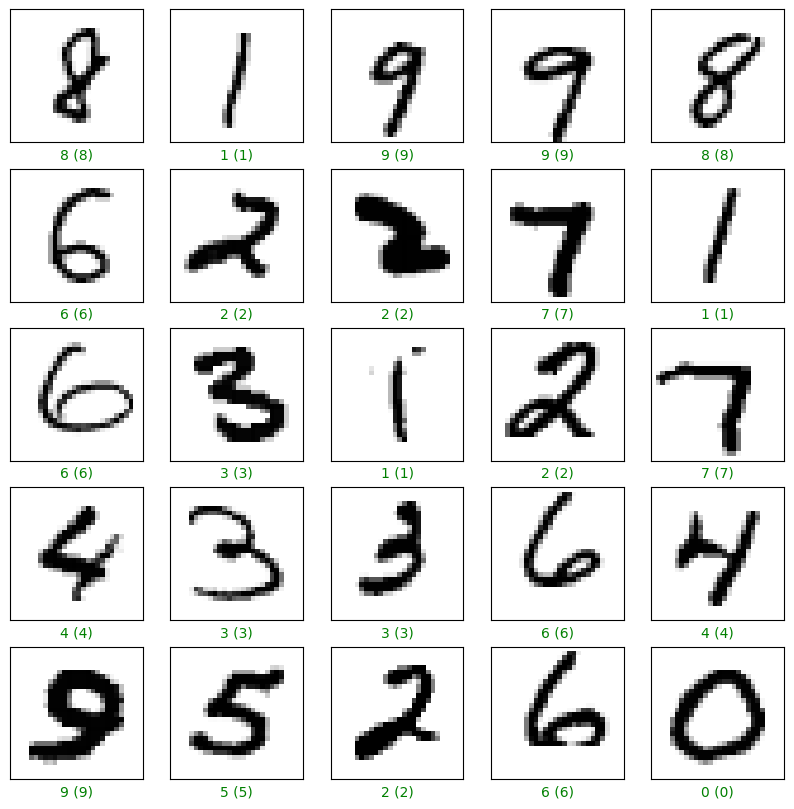

In [38]:
#Visualizing Prediction

plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i] , cmap = plt.cm.binary)
    predicted_label = np.argmax(y_predict[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} ({})".format(predicted_label,true_label), color = color)
plt.show()